# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

### ----  1 Define the problem ----

Organization's fair and well balanced pay structure is one of the top priority for any prospective employee. Organization can offer competitive salary and retain well trained employees or keep up with high turn over rates of employees who would leave the company for the reason of salary. Salary prediction is an important tool not only for HR department to offer fair salary to potential hires but also to job seekers in making more informed decisions.

In this  portfolio project, I am building model using train_features.csv and train_salaries.csv datasets to predict salaries for the job postings listed in test_features.csv with high accuracy.



In [703]:
#import your libraries
import pandas as pd
import sklearn as sk
import numpy as np

#Visualization packages
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

#Sklearn packages
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler


#your info here
__author__ = "Jaya Sharma"
__email__ = "reply2jaya@gmail.com"

## Part 2 - DISCOVER

### ---- 2 Load the data ----

In [704]:
#load the data into a Pandas dataframe
#training Dataframes

train_features = pd.read_csv('C:/Users/jayash/Desktop/myproject/train_features.csv')
train_salaries = pd.read_csv('C:/Users/jayash/Desktop/myproject/train_salaries.csv')

#Testing dataframes
test_features = pd.read_csv('C:/Users/jayash/Desktop/myproject/test_features.csv')

In [705]:
#viewing variables
test_features.head(5)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


In [706]:
train_features.head(5)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [707]:
train_salaries.head(5)

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [708]:
# merging train_salaries and train features on jobId column creating a new dataframe
df = train_features.merge(train_salaries, on='jobId', how = 'left')

In [709]:
df.head(5)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [710]:
#total number of rows and columns
df.shape

(1000000, 9)

### ---- 3 Clean the data ----

### Clean data for training dataframe

In [711]:
#statistical summary for all the variables
df.describe(include = 'all')

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
count,1000000,1000000,1000000,1000000,1000000,1000000,1000000.000000,1000000.000000,1000000.000000
unique,1000000,63,8,5,9,7,NaN,NaN,NaN
top,JOB1362685348550,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB,NaN,NaN,NaN
freq,1,16193,125886,236976,532355,143206,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,11.992386,49.529260,116.061818
std,NaN,NaN,NaN,NaN,NaN,NaN,7.212391,28.877733,38.717936
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,25.000000,88.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,50.000000,114.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,75.000000,141.000000


In [712]:
#dataframe info on data type for training dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
 8   salary               1000000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


In [713]:
#check for duplicates in training dataset
df.drop_duplicates(subset = 'jobId', inplace=True)
df.shape

#No duplicates found

(1000000, 9)

In [714]:
#look for invalid data (e.g. salaries <=0) and remove it
df = df.drop(df[df.salary <= 0].index)
df.shape

#there were 5 rows of data where salary was <=0 hence removed.

(999995, 9)

In [715]:
#checking dataframe for missing values
df.isnull().values.any()
df.isnull().sum()
#no missing values in dataframe


jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64

### ---- 4 Explore the data (EDA) ----

#### Checking the distribution and plotting the features

In [716]:
#salary is our target variable and checking salary distribution
df_info = df.salary.describe()
print(df_info)
#Minimum value is 17, maximum is 301 and mean being 116, checking for outliers.

count    999995.000000
mean        116.062398
std          38.717163
min          17.000000
25%          88.000000
50%         114.000000
75%         141.000000
max         301.000000
Name: salary, dtype: float64


C:\Users\jayash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jayash\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


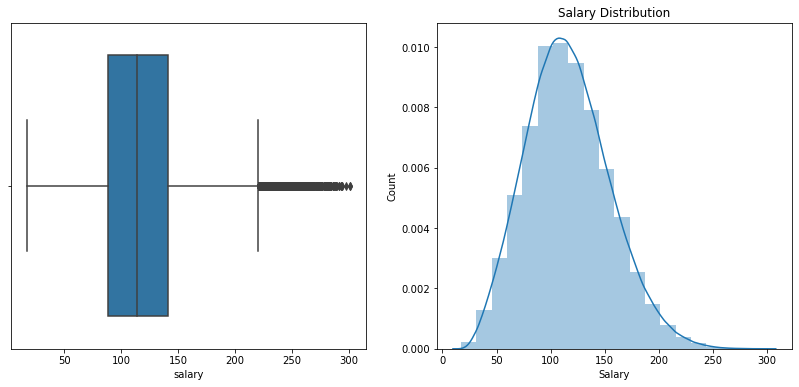

In [717]:
#Visualize target variable data 
fig = plt.figure(figsize = (14, 6))
plt.subplot(1,2,1)
sns.boxplot(df.salary)
plt.subplot(1,2,2)
sns.distplot(df.salary, bins=20)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.show()

#### Conclusions:
    -  Most salary values lie between 70k-150k
    -  Salary histogram plot has right skewness
    

In [718]:
#identifying potential outliers using interquartile method
IQR = df_info['75%'] - df_info['25%']
upper = df_info['75%'] + 1.5 * IQR
lower = df_info['25%'] - 1.5 * IQR
print('{} and {} are upper and lower boundaries for potential outliers.'.format(upper,lower))

220.5 and 8.5 are upper and lower boundaries for potential outliers.


In [719]:
#Investigating more on outliers
#first looking at outliers below lower boundary value 8.5
df[df.salary<8.5].count()


jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64

In [720]:
#Second looking at outliers above upper boundary value 220.5
df[df.salary > 220.5].count()

jobId                  7117
companyId              7117
jobType                7117
degree                 7117
major                  7117
industry               7117
yearsExperience        7117
milesFromMetropolis    7117
salary                 7117
dtype: int64

In [721]:
#Checking in to see what job types are included in that count of 7117 showing salaries above upper boundary.
df.loc[df.salary > 220.5,'jobType'].value_counts()
#Other than 20 junior roles, other jobtypes seem to be high earning positions. Looking more into junior jobtypes.

CEO               3227
CFO               1496
CTO               1488
VICE_PRESIDENT     603
MANAGER            217
SENIOR              66
JUNIOR              20
Name: jobType, dtype: int64

In [722]:
df[(df.salary > 220.5) & (df.jobType == 'JUNIOR')]
#this slice of data shows that  even though the jobType says junior, infact these roles involve around twenty years of experience
#and higher education. This data does makes sense and will not be removed from dataset.

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
160333,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223
189582,JOB1362684597269,COMP32,JUNIOR,DOCTORAL,BUSINESS,OIL,24,11,221
214606,JOB1362684622293,COMP47,JUNIOR,MASTERS,BUSINESS,FINANCE,22,4,222
303778,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226
348354,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226
427593,JOB1362684835280,COMP54,JUNIOR,DOCTORAL,ENGINEERING,FINANCE,23,3,221


In [723]:
#define a function to plot features in the dataset and look for correlation between features and target variable 
def fig_plot(df, col):
    #clarify the size of plot
    plt.figure(figsize=(14,6))
    #plot one and position
    plt.subplot(1,2,1)
    
    #if column variable is numeric then plot:
    if df[col].dtype == 'int64':
        df[col].value_counts().sort_index().plot()
    else:
    #if column is categorical plot:
        sns.countplot(x=col, data=df)
    #labels on the axis
    plt.xticks(rotation = 45)
    plt.xlabel(col)
    plt.ylabel('Counts')
    
    #plot two and position
    plt.subplot(1,2,2)
    #if column variable is numeric then plot:
    if df[col].dtype == 'int64':
        mean = df.groupby(col)['salary'].mean()
        mean.plot()
    else:
    #if column is categorical plot:
        sns.boxplot(x=col, y='salary', data = df)
    #labels on the axis
    plt.xticks(rotation = 45)
    plt.ylabel('Salaries')
    plt.show()
    

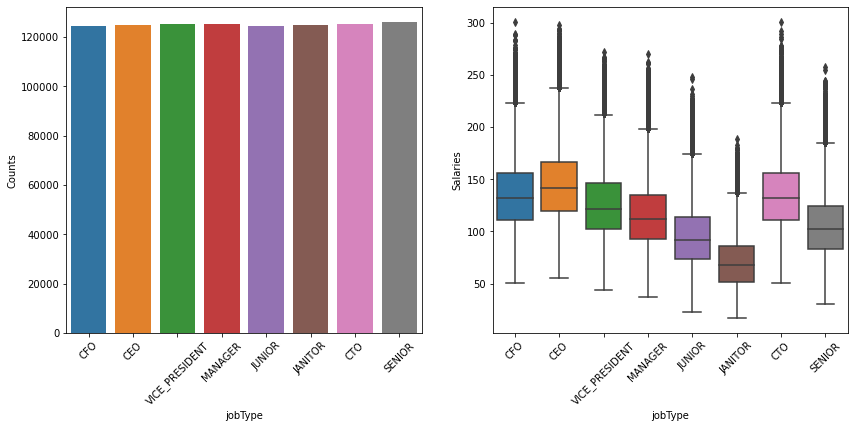

In [724]:
#first correlation between jobType and salary
fig_plot(df, 'jobType')
#All jobtypes have similar count.
#CEO,CFO,VP,CTO and other senior roles have higher pay and Janitor and junior roles have lower pay.
#Hence there is correlation between job type and salaries.

#### Conclusions:
  -  All job types have similar total number of count
  -  Boxplot showed janitors have lowest salaries and CEO, CTO,CFO have higher salaries compared to other job types
  -  There is some association between job type and salaries

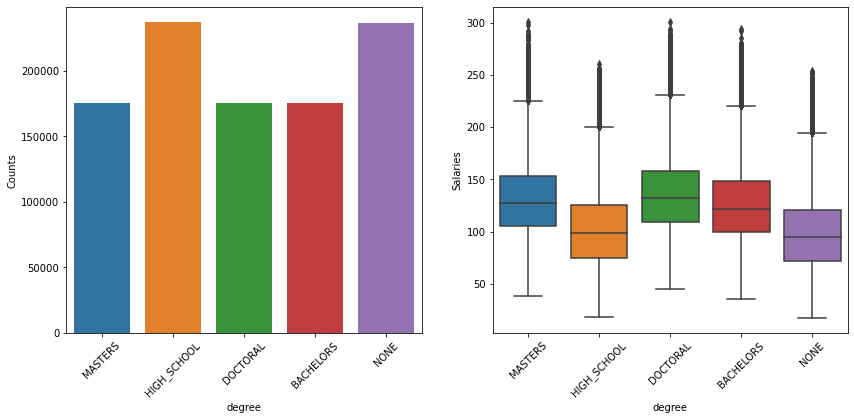

In [725]:
#correlation between degree of education and salary
fig_plot(df,'degree')


#### Conclusions:
    -  Majority of the jobs involved the degree of High school or none
    -  Boxplot showed higher you study, higher is your pay. Salary increases with the degree. Doctoral, Masters degree holders are paid higher than Bachelors or high school degrees
    -  Degree of education is related with salary

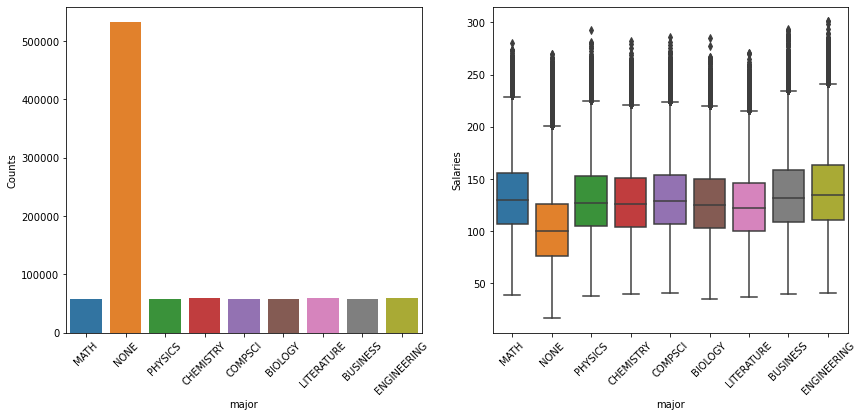

In [726]:
#correlation between major and salary
fig_plot(df,'major')


#### Conclusions:
    -  Majority of the jobholders do not have major
    -  Boxplot showed none category shows less pay suggesting candidates who do not have majors are paid less
    -  THere is some association between major and salary

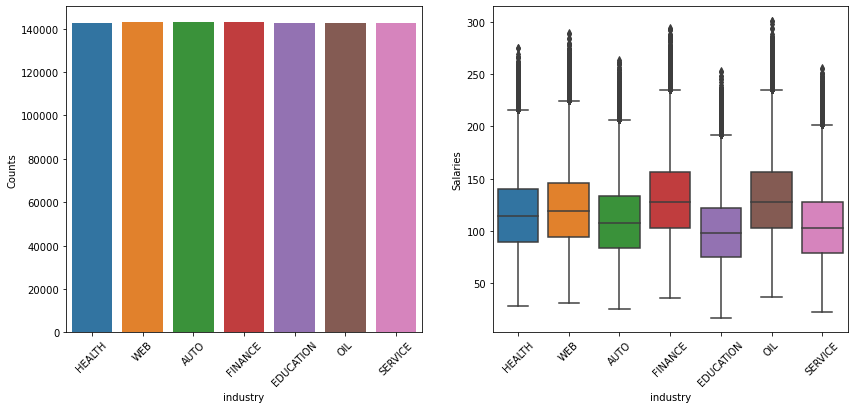

In [727]:
#correlation between industries and salary
fig_plot(df,'industry')


#### Conclusions:
    -  Job counts from various industries are somewhat equal
    -  overall all industries equally sampled as suggested by their roughly similar counts
    -  Oil and Finance industries seem to pay higher salaries suggesting there is relation between type of industry and pay

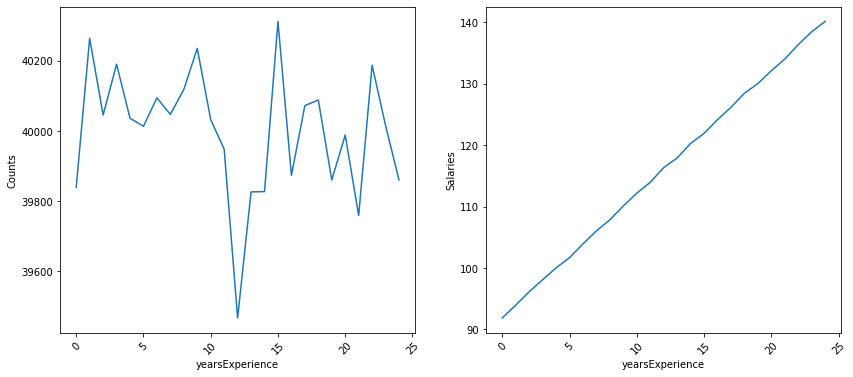

In [728]:
#correlation between 'yearsExperience' and target variable salary
fig_plot(df,'yearsExperience')


#### Conclusions:
    - We saw positive correlation between years of Experience and salary
    - Pay is increased with the years of experience

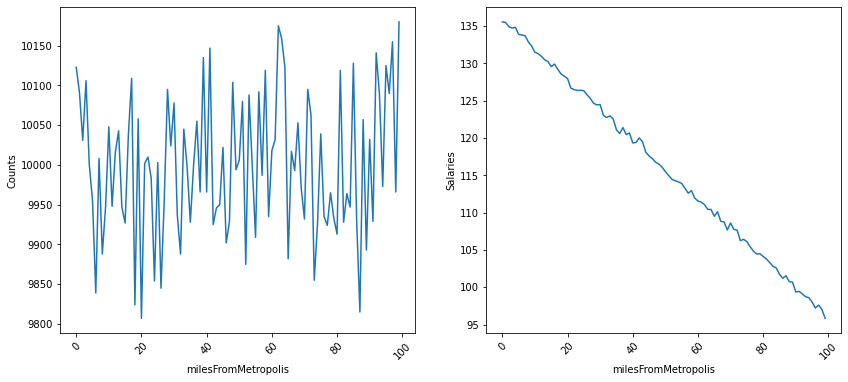

In [729]:
#correlation between 'milesFromMetropolis' and target variable salary
fig_plot(df,'milesFromMetropolis')


#### Conclusions:
    -  There is negative correlation between miles from Metropolis and salary. Pay decreases as you move away from metropolis.

In [730]:
#correlation matrix
#create a duplicate of df to find correlation between features.
corr_data = df.copy()

In [731]:
#function to encode categorical variables in dataframe


def encode_data(dataframe):
    for col in dataframe.columns:
        if dataframe[col].dtype.name == 'category' or 'object':
            le = LabelEncoder()
            dataframe[col]= le.fit_transform(dataframe[col])
    return dataframe

In [732]:
encoded=encode_data(corr_data)
encoded

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,0,31,1,3,6,3,10,83,113
1,1,11,0,2,7,6,3,73,84
2,2,48,7,1,8,3,10,38,120
3,3,32,5,1,2,0,8,17,125
4,4,60,7,0,8,2,8,16,146
...,...,...,...,...,...,...,...,...,...
999995,999990,52,7,0,2,3,19,94,71
999996,999991,17,2,2,7,2,12,35,143
999997,999992,16,4,2,7,1,16,81,47
999998,999993,23,1,3,7,3,6,5,132


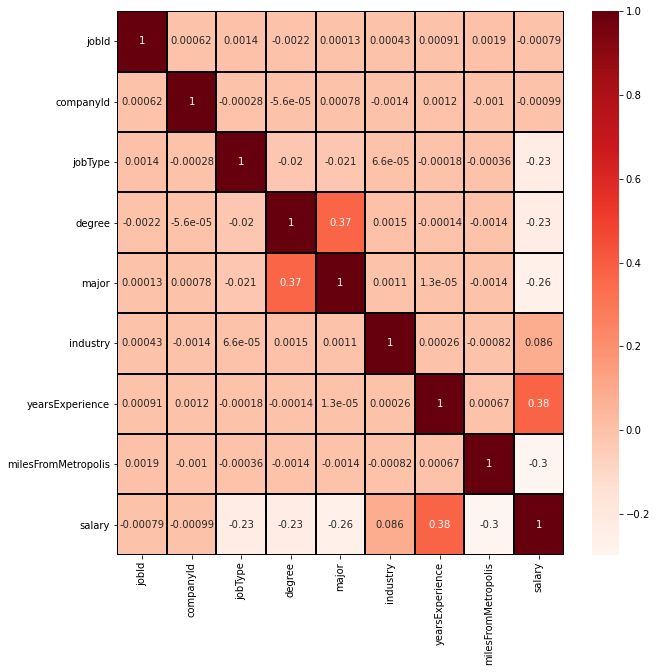

In [733]:
#create a correlation matrix to see which features are correlated.
plt.figure(figsize = (12,12))
corr=encoded.corr()
sns.heatmap(corr,xticklabels = corr.columns, yticklabels = corr.columns, cmap = 'Reds', annot = True, linewidths = 1, linecolor = 'black')
plt.show()

#### Conclusions:
    -  Positive correlation between years of experience and salary.
    -  Negative correlation between miles from metropolis, job type, degree,major and salary.
    -  Looking at the measures major and degree were most correlated. Other features did not show correlation.



### ---- 5 Establish a baseline ----

 Baseline model is created to compare with other model predictions. For baseline model, average salary for each industry was used and then MSE evaluated. Common metric for making salary comparision is average industry salary.

In [735]:

baseline_df = df.groupby('industry', as_index=False).mean()
baseline_df.rename(columns={'salary':'avg_salary'},inplace=True)
baseline_df = baseline_df[['industry','avg_salary']]
baseline_df

,industry,avg_salary
0,AUTO,109.435222
1,EDUCATION,99.448386
2,FINANCE,130.747659
3,HEALTH,115.735540
4,OIL,130.953863
5,SERVICE,104.446820
6,WEB,121.645362


In [736]:
#merging df and baseline_df
baseline_df = pd.merge(df,baseline_df, on = 'industry')

In [737]:
baseline_df.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary,avg_salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130,115.73554
1,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137,115.73554
2,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24,178,115.73554
3,JOB1362684407697,COMP56,JANITOR,HIGH_SCHOOL,NONE,HEALTH,24,30,102,115.73554
4,JOB1362684407709,COMP30,JUNIOR,BACHELORS,LITERATURE,HEALTH,18,69,105,115.73554
5,JOB1362684407710,COMP38,JUNIOR,NONE,NONE,HEALTH,20,63,76,115.73554
6,JOB1362684407717,COMP49,JUNIOR,BACHELORS,PHYSICS,HEALTH,23,2,159,115.73554
7,JOB1362684407718,COMP0,CFO,BACHELORS,PHYSICS,HEALTH,18,32,132,115.73554
8,JOB1362684407720,COMP36,JUNIOR,MASTERS,MATH,HEALTH,12,78,100,115.73554
9,JOB1362684407721,COMP31,MANAGER,DOCTORAL,NONE,HEALTH,15,14,164,115.73554


In [738]:
mse=mean_squared_error(baseline_df['salary'],baseline_df['avg_salary'])
mse
print('The mean squared error of of industry average salary is : {}.'.format(mse))

The mean squared error of of industry average salary is : 1367.1229507852554.


Usually salary standards are established on the basis of mean or median salary that runs in any industry in the given location. In our further analysis we are aiming to lower MSE below 360.

### ---- 6 Hypothesize solution ----

#### Models to improve baseline model

In the baseline model prediction, the average salary was calculated based on the data provided without fitting or feature engineering.
Next,Supervised Machine Learning algorithms were used to enhance the prediction results of our fairly large dataset. Linear Regression, decision tree models are better in time and simplicity whereas Random forest and gradient boost models are better with accuracy.


## Part 3 - DEVELOP

### ---- 7 Engineer features  ----

    -  JobId not considered for modelling as it does not have any impact in the model.
    -  CompanyId has weak correlation with all the features including target features therefore not considered in the model. 



In [741]:

#when the correlation matrix was calculated, we encoded the data to turn the categorical data into numeric values.
#use the copy function to get the encoded data

train_df=corr_data.copy()
train_df.head(5)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,0,31,1,3,6,3,10,83,113
1,1,11,0,2,7,6,3,73,84
2,2,48,7,1,8,3,10,38,120
3,3,32,5,1,2,0,8,17,125
4,4,60,7,0,8,2,8,16,146


In [742]:
#drop jobId and companyId
train_df=train_df.drop(columns=['jobId','companyId'])
train_df.head(5)

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,1,3,6,3,10,83,113
1,0,2,7,6,3,73,84
2,7,1,8,3,10,38,120
3,5,1,2,0,8,17,125
4,7,0,8,2,8,16,146


In [743]:
target = train_df['salary']
train_df=train_df.drop('salary',axis=1)

### ---- 8 Create models ----

## Linear Regression

In [745]:

x1=train_df
y1=target

x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1, test_size=0.2)


In [746]:
#Linear Regression
lr=LinearRegression()
lr.fit(x1,y1)


LinearRegression()

In [747]:
#calculating the mean squared error (mse)
mse_lr = mean_squared_error(y1_test,lr.predict(x1_test))
mse_lr

924.2563299196293

In [748]:
#we will create new pandas dataframe with model name and its mse results
results = pd.DataFrame(columns=['model','mean_square_error'])

In [749]:
#naming the columns and append results
lr_row = {'model':'Linear Regression','mean_square_error': mse_lr}
results = results.append(lr_row, ignore_index=True)

In [750]:
results

,model,mean_square_error
0,Linear Regression,924.25633


## Random Forest Regression

In [752]:
#calculating mse --Random Forest

rfr = RandomForestRegressor(n_estimators=200, n_jobs=4, max_depth=30, 
                           min_samples_split=60, max_features='auto', verbose=0)
neg_mse = cross_val_score(rfr,x1_test,y1_test,cv=5,scoring='neg_mean_squared_error')
rf_mse = -1.0* np.mean(neg_mse)

In [753]:
#appending result
ran_forest_row={'model':'Random Forest','mean_square_error': rf_mse}
results = results.append(ran_forest_row, ignore_index = True)


In [754]:
results

,model,mean_square_error
0,Linear Regression,924.256330
1,Random Forest,389.751861


## Gradient Boosting

In [755]:
#calculating mse --Gradient Boosting
gbr = GradientBoostingRegressor(n_estimators=160, max_depth=6, loss='ls',verbose=0)
neg_mse_gbr = cross_val_score(gbr,x1_test,y1_test,cv=5,scoring='neg_mean_squared_error')
gbr_mse = -1.0*np.mean(neg_mse_gbr)

In [756]:
#fitting in the model 
gbr.fit(x1_train, y1_train)

GradientBoostingRegressor(max_depth=6, n_estimators=160)

In [757]:
#appending the results
gbrow = {'model': 'Gradient Boosting','mean_square_error':gbr_mse}
results = results.append(gbrow,ignore_index=True)

In [758]:
results

,model,mean_square_error
0,Linear Regression,924.256330
1,Random Forest,389.751861
2,Gradient Boosting,358.791514


C:\Users\jayash\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\jayash\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Salary Range')

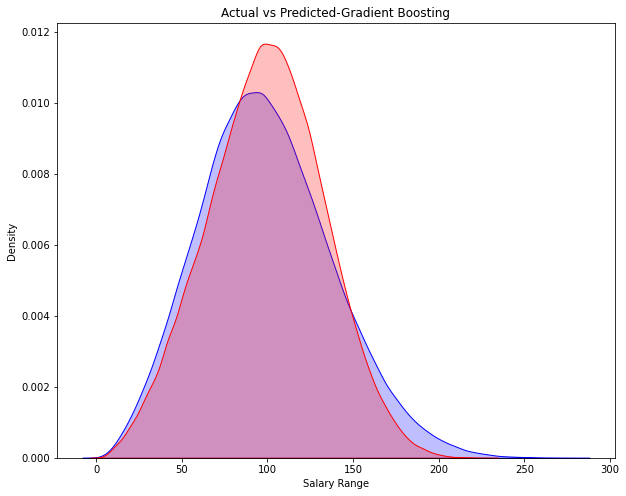

In [759]:
#checking the GradientBoosting model prediction in the plot
fig = plt.figure(figsize=(10,8))
ax1 = sns.distplot(y1_test,hist=False,color='b',label='actual',kde_kws={"shade": True})
sns.distplot(gbr.predict(x1_test),hist=False,color='r',label='predicted',kde_kws={"shade": True})
plt.title('Actual vs Predicted-Gradient Boosting')
plt.xlabel('Salary Range')

### ---- 10 Select best model  ----

In [760]:
#select the model with the lowest error as your "prodcuction" model

print('\nThe best model is: \n', results.min())



The best model is: 
 model                Gradient Boosting
mean_square_error              358.792
dtype: object


Gradient Boosting model is the best model with the mean square error of 358.

## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----

In [761]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset.
bestmodel.fit(x1,y1)

GradientBoostingRegressor(max_depth=6, n_estimators=160)

Before testing the model, checking the testing data and its format and bringing it to the same format as training dataset.

In [762]:
test_features.dtypes

jobId                  object
companyId              object
jobType                object
degree                 object
major                  object
industry               object
yearsExperience         int64
milesFromMetropolis     int64
dtype: object

In [763]:
test_features.shape

(1000000, 8)

In [764]:
#encoding categorical features using function from above 'encode_data'
encode_data(test_features)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,0,27,5,2,7,3,22,73
1,1,5,4,4,7,0,20,47
2,2,2,2,3,0,3,17,9
3,3,14,5,2,7,4,14,96
4,4,30,4,1,0,4,10,44
...,...,...,...,...,...,...,...,...
999995,999995,50,7,0,6,4,14,3
999996,999996,45,5,4,7,3,20,67
999997,999997,58,3,4,7,4,1,91
999998,999998,11,2,1,6,4,14,63


In [765]:
#drop jobId and companyId as dropped while building model
test_df=test_features.drop(columns=['jobId','companyId'],axis=1)
test_df

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,5,2,7,3,22,73
1,4,4,7,0,20,47
2,2,3,0,3,17,9
3,5,2,7,4,14,96
4,4,1,0,4,10,44
...,...,...,...,...,...,...
999995,7,0,6,4,14,3
999996,5,4,7,3,20,67
999997,3,4,7,4,1,91
999998,2,1,6,4,14,63


In [766]:
#predict now using model
predictions= bestmodel.predict(test_df)
predictions

array([ 93.50706571,  75.56334577, 164.5277813 , ...,  38.46937575,
       145.86821008,  96.94982204])

### ---- 12 Deploy solution ----

Predictions will be saved to a csv file and also some visualization created to summarise the predictions and feature importances


In [768]:
test_df['Salary Predictions'] = predictions.tolist()

In [769]:
test_df

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,Salary Predictions
0,5,2,7,3,22,73,93.507066
1,4,4,7,0,20,47,75.563346
2,2,3,0,3,17,9,164.527781
3,5,2,7,4,14,96,85.589977
4,4,1,0,4,10,44,99.629212
...,...,...,...,...,...,...,...
999995,7,0,6,4,14,3,149.017932
999996,5,4,7,3,20,67,90.219908
999997,3,4,7,4,1,91,38.469376
999998,2,1,6,4,14,63,145.868210


In [770]:
test_df.to_csv(r'Salary Predicton.csv',index=False)

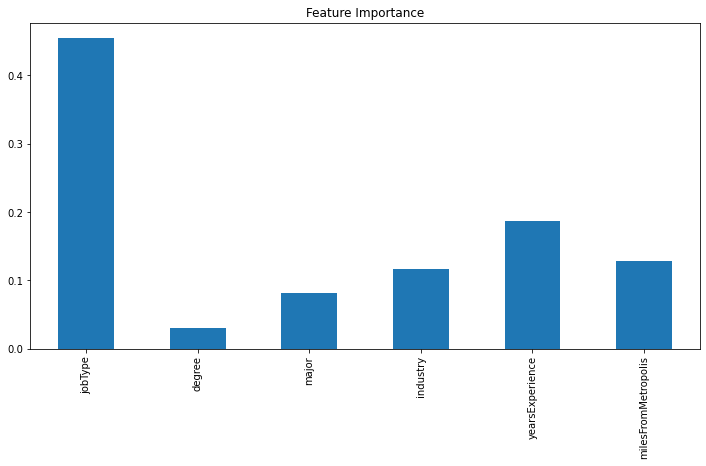

In [771]:
importances= pd.Series(bestmodel.feature_importances_, index=train_df.columns)
importances.plot(kind='bar', figsize=(12,6))
plt.title("Feature Importance")
plt.savefig('Feature Importance.png')
plt.show()